<a href="https://colab.research.google.com/github/Kashaf-Zia06/Python-AI-Bootcamp/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
# Load dataset
!unzip housedata.zip -d "/content/sample"


Archive:  housedata.zip
  inflating: /content/sample/Housing.csv  


In [7]:
df=pd.read_csv("/content/sample/Housing.csv")

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
df.shape

(545, 13)

In [11]:
df[["guestroom","basement","mainroad","hotwaterheating","airconditioning","prefarea","furnishingstatus"]]

,guestroom,basement,mainroad,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,no,no,yes,no,yes,yes,furnished
1,no,no,yes,no,yes,no,furnished
2,no,yes,yes,no,no,yes,semi-furnished
3,no,yes,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,no,yes,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,no,no,yes,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()
columns_to_encode = ["guestroom","basement","mainroad","hotwaterheating","airconditioning","prefarea"]
for col in columns_to_encode:
      df[col]=le.fit_transform(df[col])

In [14]:
from sklearn.preprocessing import OneHotEncoder
le=OneHotEncoder()
df=pd.get_dummies(df,columns=["furnishingstatus"])

In [15]:
# Check for missing values
print(df.isnull().sum())

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   mainroad                         545 non-null    int64
 6   guestroom                        545 non-null    int64
 7   basement                         545 non-null    int64
 8   hotwaterheating                  545 non-null    int64
 9   airconditioning                  545 non-null    int64
 10  parking                          545 non-null    int64
 11  prefarea                         545 non-null    int64
 12  furnishingstatus_furnished       545 non-null    b

TypeError: scatter() missing 1 required positional argument: 'y'

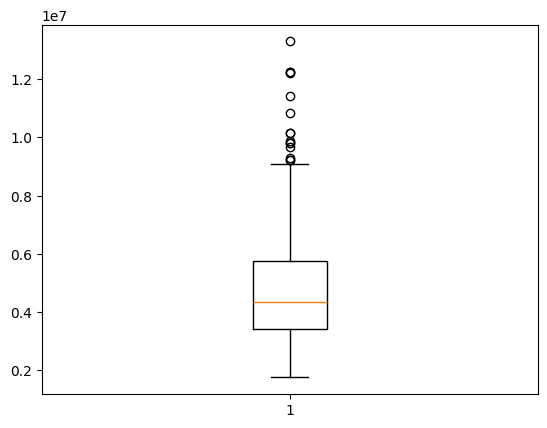

In [19]:
# Visualize the distribution of all columns using box plots
# for column in df.columns:
#     plt.figure(figsize=(8, 6))
#     plt.boxplot(df[column])
#     plt.title(f"Boxplot of {column}")
#     plt.show()

plt.boxplot(df["price"])


In [20]:
from scipy.stats import skew

# suppose your column is called "price"
print("Skewness (pandas):", df['price'].skew())
print("Skewness (scipy):", skew(df['price']))


Skewness (pandas): 1.2122388370279802
Skewness (scipy): 1.2088998457878217


<Axes: xlabel='price', ylabel='Count'>

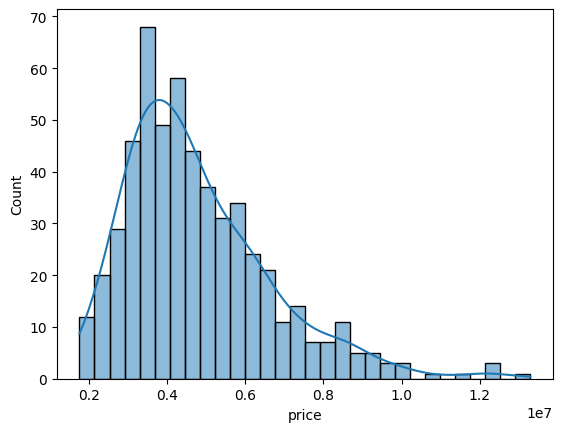

In [21]:
sns.histplot(df['price'], kde=True, bins=30)
#kde=true (add skewness line)
#Bins = intervals (30 standard)

In [22]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df['price'] < lower) | (df['price'] > upper)]
print(outliers)

       price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0   13300000   7420         4          2        3         1          0   
1   12250000   8960         4          4        4         1          0   
2   12250000   9960         3          2        2         1          0   
3   12215000   7500         4          2        2         1          0   
4   11410000   7420         4          1        2         1          1   
5   10850000   7500         3          3        1         1          0   
6   10150000   8580         4          3        4         1          0   
7   10150000  16200         5          3        2         1          0   
8    9870000   8100         4          1        2         1          1   
9    9800000   5750         3          2        4         1          1   
10   9800000  13200         3          1        2         1          0   
11   9681000   6000         4          3        2         1          1   
12   9310000   6550         4         

In [23]:
df['price_log'] = np.log1p(df['price'])   # log(1 + price)

<Axes: xlabel='price_log', ylabel='Count'>

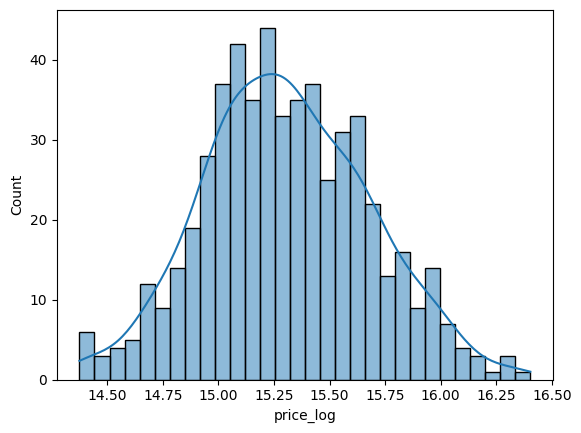

In [24]:
sns.histplot(df['price_log'], kde=True, bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c5460a6fce0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c54608e03b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c5460a6f890>],
 'medians': [<matplotlib.lines.Line2D at 0x7c54608e0a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c54608e0cb0>],
 'means': []}

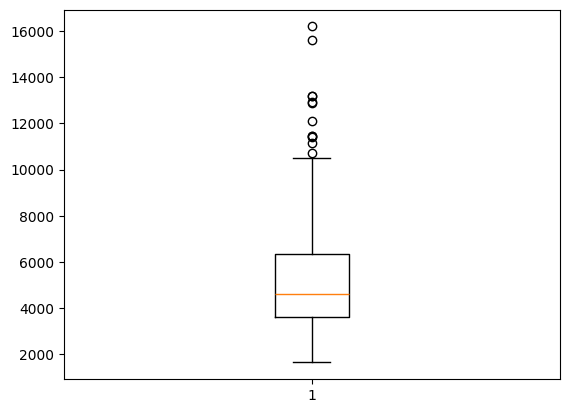

In [25]:
plt.boxplot(df["area"])

<Axes: xlabel='area', ylabel='Count'>

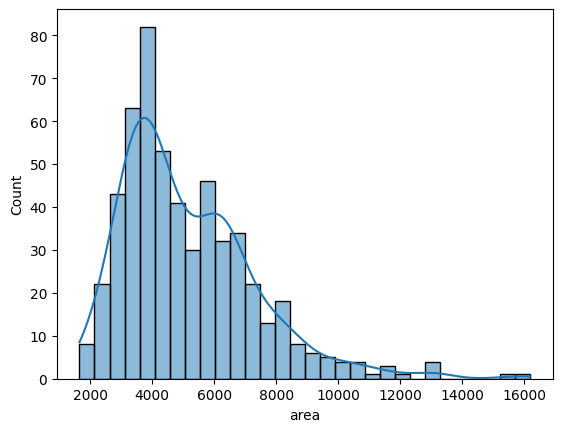

In [26]:
sns.histplot(df['area'], kde=True, bins=30)

In [27]:
df["area_log"]=np.log1p(df["area"])

<Axes: xlabel='area_log', ylabel='Count'>

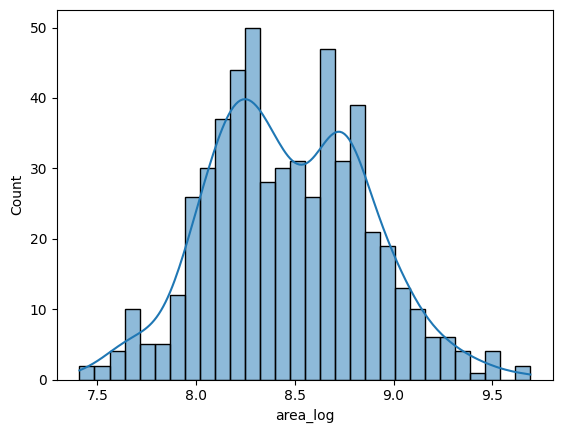

In [28]:
sns.histplot(df['area_log'], kde=True, bins=30)

In [37]:
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df['bedrooms'] < lower) | (df['bedrooms'] > upper)]
print(outliers)

        price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
7    10150000  16200         5          3        2         1          0   
28    8400000   7950         5          2        2         1          0   
34    8120000   6840         5          1        2         1          1   
89    6440000   8580         5          3        2         1          0   
112   6083000   4300         6          2        2         1          0   
143   5600000   4800         5          2        3         0          0   
152   5565000   5400         5          1        2         1          1   
271   4340000   1905         5          1        2         0          0   
340   3850000   5300         5          2        2         1          0   
356   3773000   2520         5          2        1         0          0   
395   3500000   3600         6          1        2         1          0   
536   1960000   3420         5          1        2         0          0   

     basement  hotwaterh

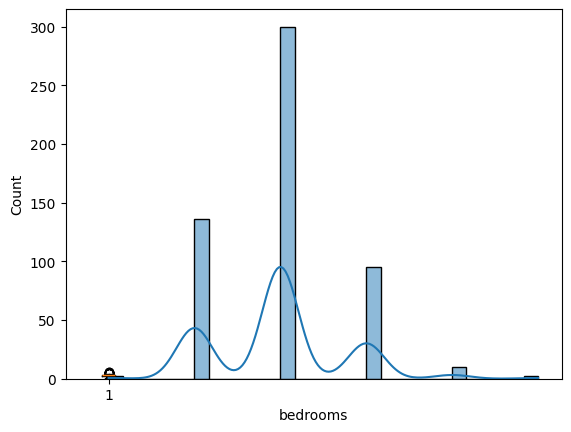

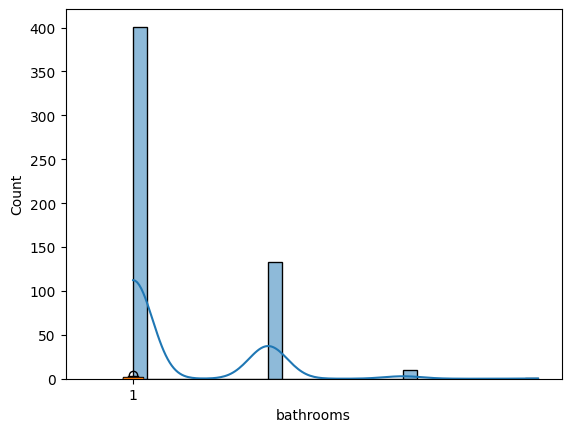

In [35]:
boxplot_cols=df[["bedrooms","bathrooms"]]
for col in boxplot_cols:
    plt.boxplot(df[col])
    sns.histplot(df[col],kde=True,bins=30)
    plt.show()



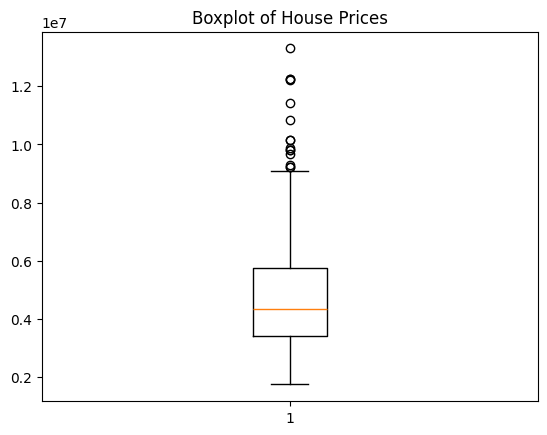

In [81]:
# Outlier detection (optional)
plt.boxplot(df["price"])
plt.title("Boxplot of House Prices")
plt.show()

In [82]:
stories_log=np.log1p(df["stories"])

<Axes: xlabel='stories', ylabel='Count'>

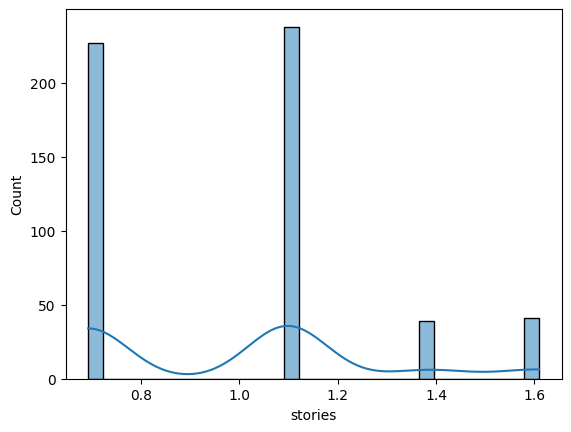

In [83]:
sns.histplot(stories_log,kde=True,bins=30)

In [98]:
# Feature-target split
#x = X = df[["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt", "Garage", "LocationScore"]]
X = df.drop(["price"], axis=1)
y = df["price"]
#y=df["price_log"]
#print(X.head())
print(y.head())

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


In [99]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.04672629  1.40341936  1.42181174 ... -0.6964292   2.9484085
   1.11933233]
 [ 1.75700953  1.40341936  5.40580863 ... -0.6964292   2.72723342
   1.59332341]
 [ 2.21823241  0.04727831  1.42181174 ... -0.6964292   2.72723342
   1.85925499]
 ...
 [-0.70592066 -1.30886273 -0.57018671 ...  1.43589615 -2.50618968
  -0.68436035]
 [-1.03338891  0.04727831 -0.57018671 ... -0.6964292  -2.50618968
  -1.23297007]
 [-0.5998394   0.04727831 -0.57018671 ...  1.43589615 -2.50618968
  -0.52956414]]


In [100]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [101]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [102]:
# Prediction
y_pred = model.predict(X_test)
# #y_pred = model.predict([[45690, 7, 2, 1, 2010, 1, 7]])
print(y_pred)

[ 4588042.47412518  6837696.7453876   3656701.37557683  6320021.78343312
  2418766.71363624  5195925.11484376  5607705.4843418   4834868.81833741
  2133797.04534809  3478890.56749477  9078684.51663096  2311574.70912927
  3623715.40039963  3263831.01474827  1469347.29302925  2857138.77140239
  2221050.43812554  7243474.03317277  2727814.76105646  2416630.75435928
  6807939.75229024  5424951.64231367   690431.96109034  5533238.28363116
  4314711.44470409  9666402.34637402  2956836.20684849  5459258.09059286
  8706512.12252241  1993117.82553907  6722911.93181494  3701690.2486274
  6812474.22782138  2531194.04676735  3332301.96526911  4541386.81628681
  4980196.54942415  3295453.61959021  3807366.29820531  1897672.9524411
  5633785.46770549  3918395.38003614  6836730.55759599  5156313.81237683
  2869192.72044789  4887168.13292959  6654878.77797139  5752576.86764791
  2906890.3199696    559839.55816088  8186542.28755512  2013781.94925807
  4516472.97069465  4110188.95064864  3138145.5137666

In [103]:
# Evaluation
print("\n📊 Evaluation Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


📊 Evaluation Metrics:
MSE: 337505177781.972
R^2 Score: 0.9332277203932341
MAE: 363931.8855567446
RMSE: 580951.9582392093


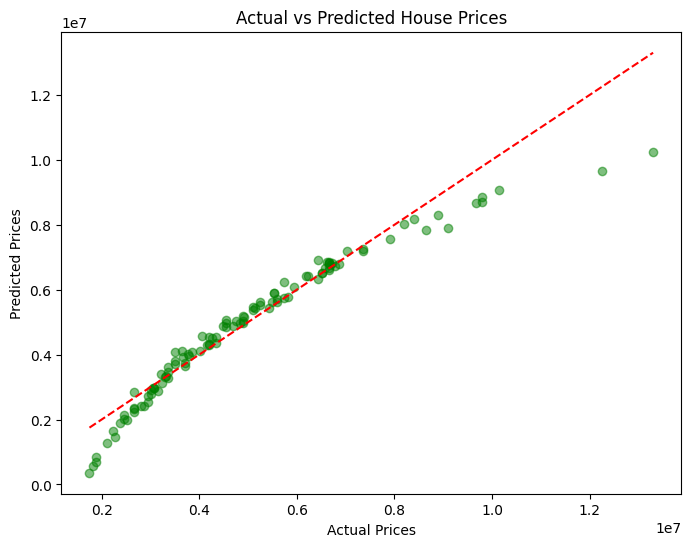

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha = 0.5,  color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.show()